<h1>New York City Taxi Fare Prediction</h1>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

<h2>Functions</h2>

<h3>Dataset</h3>

In [2]:
def load_datasets(filename, column_list, target_column):

    df = pd.read_csv(filename, delimiter=',')
    X, y = df[column_list].values, df[target_column].values
    return X, y, df

In [3]:
def split_datasets(X, y, test_size = 0.2):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    return X_train, X_test, y_train, y_test

In [4]:
def normalize(X):
    
    mean= X.mean(axis=0)
    std=X.std(axis=0)
    X_new=(X-mean)/std
    return X_new, mean, std

In [5]:
def prepare_X(X):
    
    m = X.shape[0]
    ones = np.ones((m, 1))
    X_new = np.array(X[:])
    X_new = np.column_stack((ones, X_new))
    return X_new

<h3>Analysis of data</h3>

In [6]:
def histograms(data):
    
    data.hist(bins = 50, figsize = (20,15))
    plt.tight_layout()
    plt.show()

In [7]:
def correlation(data):
    
    plt.figure(figsize=(16, 6))
    sns.heatmap(data.corr(method='spearman'), annot=True)
    plt.title('Correlation', fontdict={'fontsize':12}, pad=12);

In [8]:
def pairpl(data):
    
    pairplot_columns=["fare_amount", "pickup_datetime"]
    sns.pairplot(data[pairplot_columns])
    plt.show();

<h3> Linear Regression</h3>

In [9]:
def hypothesis(X, theta):
    h_theta=np.dot(X, theta)
    return h_theta

In [10]:
def cost_function(X, y, theta):
    m = X.shape[0]
    if m == 0:
        return None
    J = np.sum((hypothesis(X, theta) - y)**2)/(2*m)
    return J

In [11]:
def derivative(X, y, theta):
    m = X.shape[0]

    d_thetha=(1/m)*(np.dot(hypothesis(X, theta)-y, X))
    return d_thetha

In [12]:
def gradient_descent(X, y, theta, alpha, num_iters, print_J = True):

    m = X.shape[0]
    J_history = []
    J = cost_function(X, y, theta)
    if print_J == True:
        print(J)
    J_history.append(J)
    for i in range(num_iters):
        
        d_theta = derivative(X, y, theta)
        delta = alpha * d_theta
        theta = theta - delta

        J = cost_function(X, y, theta)

        if print_J == True:
            print(J)
        J_history.append(J)
    return theta, J_history

In [35]:
def sklearnAlgorithm(X_train, X_test, y_train, y_test):

    clf = LinearRegression()
    clf.fit(X_train, y_train)
    y_result = clf.predict(X_test)

    lin_mse = mean_squared_error(y_test, y_result)
    lin_mae = mean_absolute_error(y_test, y_result)
    lin_rmse = np.sqrt(lin_mse)
    rel_diff = np.abs(np.divide(y_test - y_result, y_test)) * 100

    print(rel_diff)
    
    return lin_mse, lin_mae, lin_rmse

<h2>Main program</h2>

<h3>Load dataset</h3>

In [14]:
data = pd.read_csv("train2.csv")

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11999 entries, 0 to 11998
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   key                11999 non-null  object 
 1   fare_amount        11999 non-null  float64
 2   pickup_datetime    11999 non-null  object 
 3   pickup_longitude   11999 non-null  float64
 4   pickup_latitude    11999 non-null  float64
 5   dropoff_longitude  11999 non-null  float64
 6   dropoff_latitude   11999 non-null  float64
 7   passenger_count    11999 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 750.1+ KB


In [15]:
#datetime adaptation
datetime = data['pickup_datetime']
datetime = pd.to_datetime(datetime)
datetime = datetime.apply(lambda x: x.value)/10**9
data['pickup_datetime'] = datetime

In [16]:
data.isnull().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [17]:
data.head(10)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,1.245087e+09,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,1.262710e+09,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,1.313628e+09,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,1.334983e+09,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,1.268121e+09,-73.968095,40.768008,-73.956655,40.783762,1
5,2011-01-06 09:50:45.0000002,12.1,1.294307e+09,-74.000964,40.731630,-73.972892,40.758233,1
6,2012-11-20 20:35:00.0000001,7.5,1.353444e+09,-73.980002,40.751662,-73.973802,40.764842,1
7,2012-01-04 17:22:00.00000081,16.5,1.325698e+09,-73.951300,40.774138,-73.990095,40.751048,1
8,2012-12-03 13:10:00.000000125,9.0,1.354540e+09,-74.006462,40.726713,-73.993078,40.731628,1
9,2009-09-02 01:11:00.00000083,8.9,1.251854e+09,-73.980658,40.733873,-73.991540,40.758138,2


<h3>Data analysis</h3>

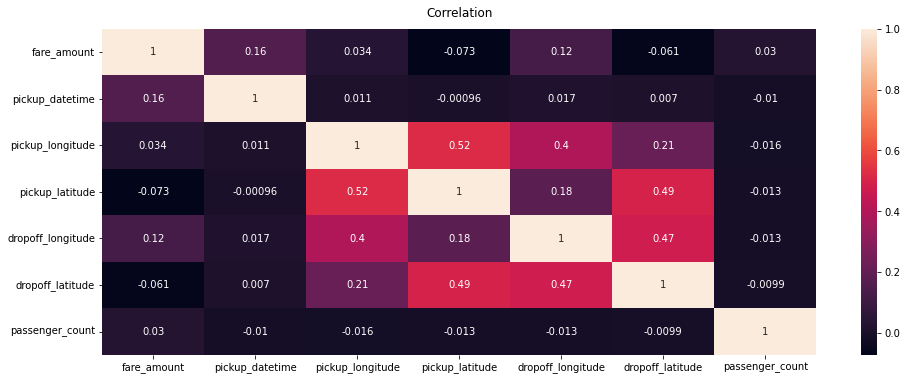

In [18]:
correlation(data)

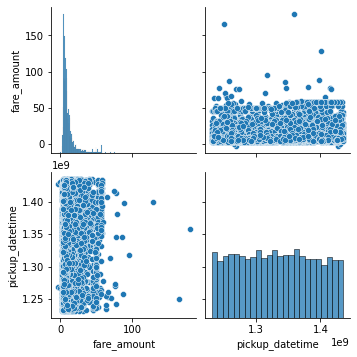

In [19]:
pairpl(data)

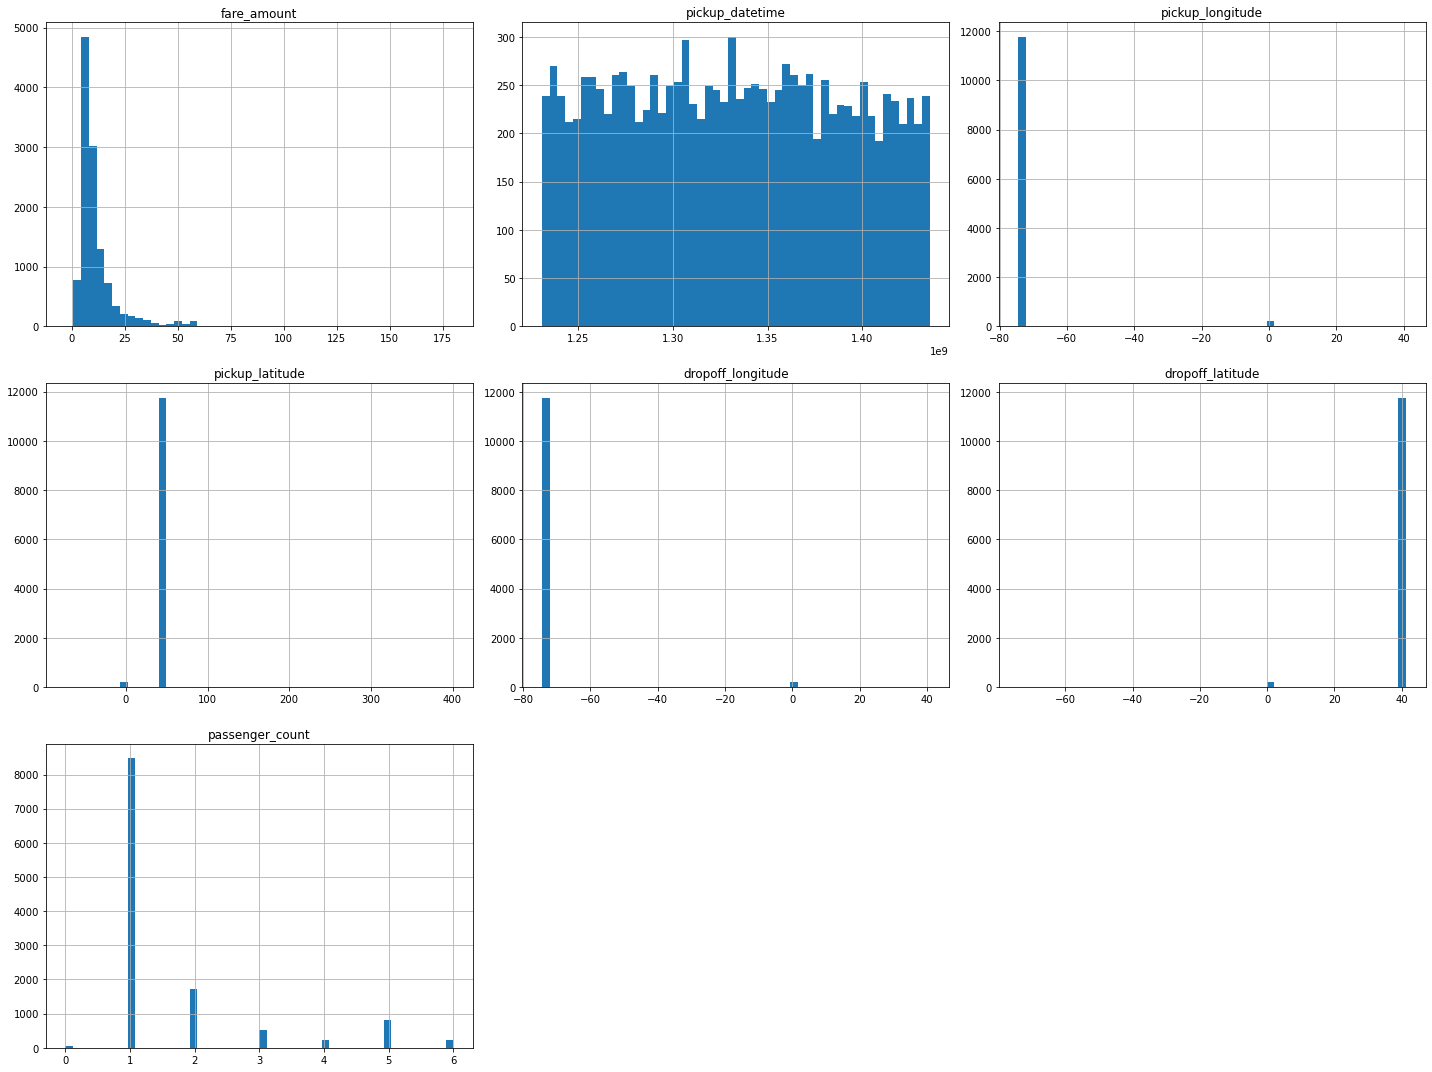

In [20]:
histograms(data)

<h3>Linear regression</h3>

In [21]:
X, y = data[['pickup_datetime','pickup_longitude','pickup_latitude','dropoff_longitude', 'dropoff_latitude','passenger_count']], data['fare_amount']
X_train, X_test, y_train, y_test = split_datasets(X, y, 0.2)
print('Training set: X={}, y={}'.format(X_train.shape, y_train.shape))
print('Test set: X={}, y={}'.format(X_test.shape, y_test.shape))

Training set: X=(9599, 6), y=(9599,)
Test set: X=(2400, 6), y=(2400,)


<h4>SKLearn algorithm</h4>

In [36]:
skl_mse, skl_mae, skl_rmse = sklearnAlgorithm(X_train, X_test, y_train, y_test)

8254     276.117487
1758     559.647834
1941     407.535049
10190    316.691381
10085    212.635503
            ...    
10571    230.722454
8319     237.894335
8346     437.075019
11836    263.100086
1287     559.647256
Name: fare_amount, Length: 2400, dtype: float64


<h4>My algorithm</h4>

In [23]:
X_train_norm, mean, std = normalize(X_train)
X = prepare_X(X_train_norm)
theta = np.zeros(7)

In [24]:
print(X_train_norm)

       pickup_datetime  pickup_longitude  pickup_latitude  dropoff_longitude  \
104          -0.326451         -0.141505         0.112085          -0.140382   
4808          0.635792         -0.139921         0.111075          -0.142197   
4913         -1.063980         -0.141547         0.110253          -0.138058   
8736         -0.855033         -0.140652         0.109177          -0.133066   
11393        -1.203511         -0.140126         0.109609          -0.140012   
...                ...               ...              ...                ...   
1637          1.661059          6.954450        -5.526358           6.976502   
1217          0.216222         -0.143741         0.105644          -0.141007   
10160         1.083103         -0.129466         0.113190          -0.139121   
3731          0.520986         -0.139219         0.117580          -0.139536   
4908         -0.224043         -0.140949         0.109650          -0.139557   

       dropoff_latitude  passenger_coun

In [25]:
y = y_train[:]

In [26]:
print(cost_function(X, y, theta))

108.81930724554641


In [27]:
alpha = 0.01
num_iters = 3000

In [28]:
new_theta, Js = gradient_descent(X, y, theta, alpha, num_iters, False)
print('Theta: {}'.format(new_theta))

Theta: [11.22593083  1.13412939  0.21998431 -0.1564536  -0.20132472  0.18771438
  0.16284489]


In [31]:
X_test, mean, std = normalize(X_test)
X_test_prep = prepare_X(X_test)
y_result = hypothesis(X_test_prep, new_theta)


lin_mse = mean_squared_error(y_test, y_result)
lin_mae = mean_absolute_error(y_test, y_result)
lin_rmse = np.sqrt(MSE)
rel_diff = np.abs(np.divide(y_test - y_result, y_test)) * 100

print(rel_diff)
print("------------------")
print('MSE  = ', lin_mse)
print('MAE  = ', lin_mae)
print('RMSE = ', lin_rmse)

print(cost_function(X_test_prep, y_test, new_theta))


8254      55.282774
1758     221.444986
1941     129.689377
10190     79.293542
10085     11.048048
            ...    
10571      4.310394
8319       6.840453
8346     147.130986
11836      5.347520
1287     218.127444
Name: fare_amount, Length: 2400, dtype: float64
------------------
MSE  =  90.64656892389519
MAE  =  5.944347137732981
RMSE =  9.520849170315387
45.323284461947594


<h4>Compare the results</h4>

In [30]:
print("The difference between my algorithm's errors and slkearn's errors:")
print('MSE:  ', (lin_mse-skl_mse))
print('MAE:  ', (mae-skl_mae))
print('RMSE: ', (rmse-skl_rmse))

The difference between my algorithm's errors and slkearn's errors:
MSE:   -0.018985709074939905
MAE:   -0.016971403137198138
RMSE:  -0.0009970074471024049
